In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
print("OpenCV-Python Version {}".format(cv2.__version__))

OpenCV-Python Version 4.10.0


In [2]:
!wget --no-check-certificate https://madm.dfki.de/files/sentinel/EuroSAT.zip

--2024-09-07 16:02:56--  https://madm.dfki.de/files/sentinel/EuroSAT.zip
Resolving madm.dfki.de (madm.dfki.de)... 131.246.195.183
Connecting to madm.dfki.de (madm.dfki.de)|131.246.195.183|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 94280567 (90M) [application/zip]
Saving to: ‘EuroSAT.zip’

EuroSAT.zip         100%[===================>]  89.91M  21.6MB/s    in 5.3s    

2024-09-07 16:03:02 (16.9 MB/s) - ‘EuroSAT.zip’ saved [94280567/94280567]



In [3]:
!unzip 'EuroSAT.zip'

Streaming output truncated to the last 5000 lines.
  inflating: 2750/SeaLake/SeaLake_2206.jpg  
  inflating: 2750/SeaLake/SeaLake_1313.jpg  
  inflating: 2750/SeaLake/SeaLake_263.jpg  
  inflating: 2750/SeaLake/SeaLake_967.jpg  
  inflating: 2750/SeaLake/SeaLake_515.jpg  
  inflating: 2750/SeaLake/SeaLake_1465.jpg  
  inflating: 2750/SeaLake/SeaLake_1817.jpg  
  inflating: 2750/SeaLake/SeaLake_2902.jpg  
  inflating: 2750/SeaLake/SeaLake_2570.jpg  
  inflating: 2750/SeaLake/SeaLake_1004.jpg  
  inflating: 2750/SeaLake/SeaLake_174.jpg  
  inflating: 2750/SeaLake/SeaLake_2111.jpg  
  inflating: 2750/SeaLake/SeaLake_2388.jpg  
  inflating: 2750/SeaLake/SeaLake_1948.jpg  
  inflating: 2750/SeaLake/SeaLake_838.jpg  
  inflating: 2750/SeaLake/SeaLake_2738.jpg  
  inflating: 2750/SeaLake/SeaLake_1999.jpg  
  inflating: 2750/SeaLake/SeaLake_2359.jpg  
  inflating: 2750/SeaLake/SeaLake_2660.jpg  
  inflating: 2750/SeaLake/SeaLake_1775.jpg  
  inflating: 2750/SeaLake/SeaLake_605.jpg  
  inflatin

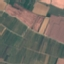

In [4]:
# show an image
img = cv2.imread("/content/2750/PermanentCrop/PermanentCrop_1.jpg")

from google.colab.patches import cv2_imshow
cv2_imshow(img)


In [21]:
# using OpenCV, creating the matrix, looping over each image, creating csv
import os
import numpy as np
import pandas as pd

# Define the path to the dataset
dataset_path = '/content/2750'

# Initialize an empty list to store the feature vectors and labels
features = []
labels = []

# assign numeric labels
numlabels = {
    'AnnualCrop': 0,
    'Forest': 1,
    'HerbaceousVegetation': 2,
    'Highway': 3,
    'Industrial': 4,
    'Pasture': 5,
    'PermanentCrop': 6,
    'Residential': 7,
    'River': 8,
    'SeaLake': 9
}

# loop through each folder, get list of files and directories in dataset
for folder in os.listdir(dataset_path):
    # get concatenated path to the folder
    folder_path = os.path.join(dataset_path, folder)
    if not os.path.isdir(folder_path):  ####
        continue

    # loop through each image in the folder
    for img_name in os.listdir(folder_path):
        # get concatenated path to the image
        img_path = os.path.join(folder_path, img_name)

        # load image, return np array with pixel values
        img = cv2.imread(img_path)

        ####
        # make sure image size is 64x64
        img_resized = cv2.resize(img, (64, 64))

        #get RGB values
        img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB) #Using this because we want to have RBG values and the default cv2.IMREAD_COLOR flag reads as BGR - aishu
        # flatten image to 1D array
        img_flattened = img_rgb.flatten()
                #add rgb vals, and make sure label is added (numerical ver)

        #FIGURE THIS OUT - flattening image, appending to list
        features.append(img_flattened)
        labels.append(numlabels[folder])

# Convert the features and labels into numpy arrays so we can append
features = np.array(features)
labels = np.array(labels)
data = np.column_stack((features, labels))
df = pd.DataFrame(data)
df.to_csv('eurosat_data.csv')

        ####

print("done")



done


In [22]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,12288
0,46,76,76,46,76,76,46,74,77,46,...,97,93,94,100,94,96,98,92,94,5
1,45,85,85,46,86,86,47,82,84,47,...,44,79,81,44,79,83,45,80,84,5
2,123,125,124,127,123,120,139,121,117,172,...,178,147,129,177,144,127,178,145,128,5
3,76,95,93,76,95,93,75,95,94,75,...,39,66,75,37,66,74,37,66,74,5
4,53,89,85,53,89,85,55,95,87,56,...,55,97,87,62,97,90,64,97,90,5


In [23]:
df.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,12288
26997,85,105,114,83,106,112,73,96,102,73,...,81,102,105,78,99,102,78,102,104,3
26998,66,91,95,69,90,95,85,95,107,90,...,60,78,90,59,79,90,59,79,90,3
26999,103,114,106,103,115,105,106,114,101,123,...,100,111,105,112,122,111,117,128,112,3
